## 1. Hyperparametersuche

Fast alle Machine Learning Modelle verfügen über sogenannte Hyperparamter. Dies sind veränderliche Bestandteile des Modells bzw. des Trainings im weiteren Sinne (also auch Vorverarbeitungen der Daten), die nicht durch die Daten bestimmt werden können. Dies ist im Kontrast zu Parametern wie zum Beispiel den Gewichten in einem Neuronenmodell, die eben genau durch die Daten bestimmt werden.

Hyperparameter müssen abgestimmt werden ohne dabei auf die Testdaten zurückzugreifen. Werden Testdaten zur Abstimmung verwendet, nennt man diesen methodischen Fehler *data leakage* - also das Einsickern der Testdaten in den Lernprozess. Damit einher geht eine möglicherweise falsch geschätzte Generalisierungsfähigkeit des Modells - die Testdaten sind keine Testdaten mehr.

Der korrekte Ansatz zur Abstimmung der Hyperparameter ist die Benutzung eines Validierungsdatensatzes. Ein Teil der Trainingsdaten wird zur Validierung von Modellen mit verschiedenen Hyperparametern genutzt - die Testdaten bleiben unangetastet.

Folgende Hyperparameter haben wir kennengelernt:

- Lineare Regression
    - `Ridge` versus `Lasso` versus `ElasticNet` - Art der Regularisierung
    - `alpha` - Stärke der Regularisierung
    - `degree` - Grad einer möglichen polynomischen Expansion
- Logistische Regression
    - `C` - inverse Stärke der Regularisierung
    - `penalty= "l2" / "l1" / "elasticnet"`- Art der Regularisierung
- Decision Trees
    - `max_depth`
- Random Forest
    - `max_depth`
    - `n_estimators`
- Gradient Boosting
    - `max_depth`
    - `n_estimators`
    - `learning_rate`
- Support Vector Machines
    - `C` - inverse Stärke der Regularisierung
    - `kernel = "rbf" / "linear"`
    - `gamma`
- K-Nearest Neighbors
    - `n_neighbors`


### 1.1 Daten und Vorbereitung

Wir untersuchen ein künstlich erstelltes Regressionsproblem.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: Scikit-Learn Importe
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# TODO: Hilfsfunktion zum Erstellen einer polynomischen Regression
def get_regression(alpha=1.0, degree=2):
    model = make_pipeline(
        PolynomialFeatures(degree=degree, include_bias=False),
        Ridge(alpha=alpha, normalize=True)
    )
    return model

In [8]:
# Hilfsfunktion zu Generierung eines Toy-Datensatzes
# für ein Regressionsproblem
def make_data(N=30, err=0.8, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

Text(0, 0.5, 'y [Verkaufspreis]')

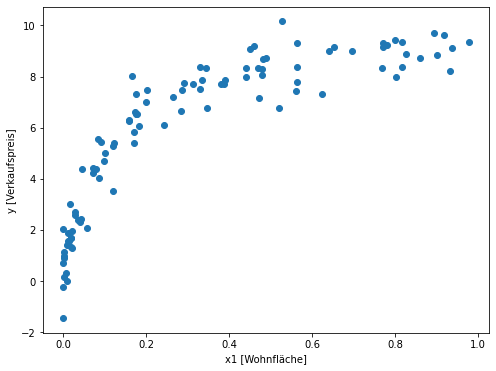

In [9]:
# TODO: Visualisierung der Daten
# shape [N, 1] für X und [N, ] für y
X, y = make_data(N=100)

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.xlabel("x1 [Wohnfläche]")
plt.ylabel("y [Verkaufspreis]")

In [10]:
# TODO: Trainings- und Testdaten aufspalten
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [14]:
# TODO: Fitten des Modells ohne Hyperparametersuche
ridge = get_regression(alpha=1.0, degree=2)
ridge.fit(X_train, y_train)

y_pred_test = ridge.predict(X_test)

# Option 1: MSE oder RMSE
mse = mean_squared_error(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)

# Option 2: R2
r2 = r2_score(y_test, y_pred_test)
r2

0.5017302093227249

### 1.2. Hyperparametersuche per Scikit-Learn API

Scikit-Learn stellt zur Abstimmung der Hyperparameter verschiedene Klassen zur Verfügung. Diese Klassen führen die nötigen for-Schleifen intern aus. 

![gridsearch_cv](https://raw.githubusercontent.com/layerwise/training/main/assets/gridsearch_cv.png)

Die obenstehende Graphik ist durch `GridSearchCV` von Scikit-Learn umgesetzt.

```python
>>> from sklearn.model_selection import GridSearchCV
>>> GridSearchCV?
```

Wir müssen von außen nur folgendes festlegen: 

- `param_grid` - den Suchraum der Hyperparameter
- `model` - das zu Grunde liegende Modell
- `cv` - die Anzahl der Kreuzvalidierungs-Faltungen, typischerweise 3, 5 oder 10
- `scoring` - die zu optimierende Metrik

Um alle möglichen Evaluationsmetriken anzuzeigen ist folgender Code hilfreich

```python
>>> from sklearn.metrics import SCORERS
>>> sorted(SCORERS.keys())
```

Die Klasse `GridSearchCV` verhält sich ganz im Sinne von Scikit-Learn ganz genau so wie jedes andere Basis-Modell auch. Das heißt es gibt dort eine `fit` und `predict` Funktion, in denen alle Arbeitsschritte schon integriert sind.

Nach einem erfolgreichen Fit, das heißt einer Abstimmung der Hyperparameter durch `GridSearchCV` sind unter anderem folgende Attribute relevant:

- `best_estimator_`
- `best_params_`
- `best_score_`
- `cv_results_`

In [7]:
ridge

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge(normalize=True))])

In [8]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "ridge__alpha": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    "polynomialfeatures__degree": np.arange(1, 15)
}

ridge_hp_tuning = GridSearchCV(
    ridge,
    param_grid=param_grid,
    cv=10,
    scoring="r2",
    n_jobs=2
)

ridge_hp_tuning.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ridge', Ridge(normalize=True))]),
             n_jobs=2,
             param_grid={'polynomialfeatures__degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5,
                                          1.0, 5.0, 10.0]},
             scoring='r2')

In [16]:
ridge_hp_tuning.best_estimator_

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=8, include_bias=False)),
                ('ridge', Ridge(alpha=0.001, normalize=True))])

In [17]:
ridge_hp_tuning.best_params_

{'polynomialfeatures__degree': 8, 'ridge__alpha': 0.001}

In [18]:
ridge_hp_tuning.best_score_

0.9200464399385389

In [19]:
ridge_hp_tuning.cv_results_

{'mean_fit_time': array([0.00071712, 0.00057197, 0.00059795, 0.00059488, 0.00056446,
        0.00058391, 0.00058475, 0.00056634, 0.00056069, 0.0044935 ,
        0.00213397, 0.0005919 , 0.00061445, 0.00062714, 0.00060828,
        0.00059841, 0.00059845, 0.00059621, 0.00059328, 0.00060744,
        0.00061131, 0.00062084, 0.00060563, 0.00060065, 0.00060613,
        0.00060599, 0.00061715, 0.00060928, 0.00059614, 0.00060368,
        0.00059552, 0.00059912, 0.00061171, 0.00059776, 0.00059445,
        0.00059831, 0.00059891, 0.00059752, 0.00060568, 0.00060008,
        0.000612  , 0.00060608, 0.00059879, 0.0006047 , 0.00060637,
        0.00061245, 0.00060468, 0.00063205, 0.00062456, 0.00060606,
        0.00060275, 0.00060587, 0.00061262, 0.00059385, 0.00060036,
        0.00066214, 0.00060403, 0.0006438 , 0.00070214, 0.00078676,
        0.00064695, 0.0007627 , 0.00076354, 0.00075297, 0.00061808,
        0.00060754, 0.0006027 , 0.00065529, 0.0006016 , 0.00063746,
        0.00068753, 0.00063763,

In [20]:
y_pred_test = ridge_hp_tuning.predict(X_test)

score = r2_score(y_test, y_pred_test)
score

0.893113776426629

### 1.3 Hyperparametersuche durch vorgefertigte Modelle

Die Klasse `GridSearchCV` ist für beliebige Modelle (und besonders für Pipelines) nutzbar. Für viele Modelle allerdings ist die Abstimmung von Hyperparametern so alltäglich, dass es spezialisierte Klassen gibt.
Diese sind:
- `RidgeCV`
- `LassoCV`
- `ElasticNetCV`
- `LogisticRegressionCV`

Diese setzen exakt das um, was `GridSearchCV` auch könnte, also sind folgende Codes identisch

```python
>>> model = GridSearchCV(
...     Ridge(),
...     param_grid={"alpha": [0.01, 0.1, 1.0]})
>>> model.fit(X, y)
```

und

```python
>>> model = RidgeCV(alphas=[0.01, 0.1, 1.0])
>>> model.fit(X, y)
```

![gridsearch_cv](https://raw.githubusercontent.com/layerwise/training/main/assets/gridsearch_cv.png)

In [21]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV, LogisticRegressionCV

ridge_cv = RidgeCV(
    alphas=[0.01, 0.1, 1.0, 10.0]
)

ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.01,  0.1 ,  1.  , 10.  ]))

In [22]:
ridge_cv.alpha_

0.1

In [23]:
ridge_cv_poly = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0], normalize=True)
)

In [24]:
ridge_cv_poly.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('ridgecv',
                 RidgeCV(alphas=array([ 0.01,  0.1 ,  1.  , 10.  ]),
                         normalize=True))])

### 1.4. Hyperparametersuche durch Zufallssuche

Im Allgemeinen ist die sogenannte erschöpfende Gittersuche nicht nötig und auch nicht empfehlenswert, wie anhand folgender Graphik erkennbar. Dann kann statt `GridSearchCV` besser `RandomizedSearchCV` verwendet werden.

![gridsearch_vs_randomsearch](https://raw.githubusercontent.com/layerwise/training/main/assets/gridsearch_vs_randomsearch.png)


In [25]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    "ridge__alpha": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    "polynomialfeatures__degree": np.arange(1, 15)
}

ridge_hp_tuning_random = RandomizedSearchCV(
    ridge,
    param_distributions=param_distributions,
    cv=10,
    scoring="r2",
    n_jobs=2,
    n_iter=50
)

ridge_hp_tuning_random.fit(X_train, y_train)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('ridge', Ridge(normalize=True))]),
                   n_iter=50, n_jobs=2,
                   param_distributions={'polynomialfeatures__degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'ridge__alpha': [0.001, 0.005, 0.01,
                                                         0.05, 0.1, 0.5, 1.0,
                                                         5.0, 10.0]},
                   scoring='r2')

In [26]:
ridge_hp_tuning_random.best_params_

{'ridge__alpha': 0.001, 'polynomialfeatures__degree': 10}

In [27]:
ridge_hp_tuning_random.cv_results_["params"]

[{'ridge__alpha': 0.01, 'polynomialfeatures__degree': 4},
 {'ridge__alpha': 0.1, 'polynomialfeatures__degree': 4},
 {'ridge__alpha': 5.0, 'polynomialfeatures__degree': 3},
 {'ridge__alpha': 1.0, 'polynomialfeatures__degree': 5},
 {'ridge__alpha': 0.5, 'polynomialfeatures__degree': 1},
 {'ridge__alpha': 0.005, 'polynomialfeatures__degree': 8},
 {'ridge__alpha': 0.5, 'polynomialfeatures__degree': 11},
 {'ridge__alpha': 0.05, 'polynomialfeatures__degree': 6},
 {'ridge__alpha': 5.0, 'polynomialfeatures__degree': 9},
 {'ridge__alpha': 0.1, 'polynomialfeatures__degree': 8},
 {'ridge__alpha': 5.0, 'polynomialfeatures__degree': 8},
 {'ridge__alpha': 0.1, 'polynomialfeatures__degree': 5},
 {'ridge__alpha': 0.01, 'polynomialfeatures__degree': 13},
 {'ridge__alpha': 0.005, 'polynomialfeatures__degree': 7},
 {'ridge__alpha': 0.001, 'polynomialfeatures__degree': 10},
 {'ridge__alpha': 0.001, 'polynomialfeatures__degree': 1},
 {'ridge__alpha': 0.05, 'polynomialfeatures__degree': 14},
 {'ridge__alpha

## 2. Kreuzvalidierung

Die Kreuzvalidierung kann nicht nur zur Abstimmung von Hyperparametern verwendet werden. Tatsächlich ist ihre vornehmliche Funktion, die Generalisierungsfähigkeit des Modells besser zu schätzen. Statt eines einzigen Testdatensatzes, der immer zufälligen Schwankungen ausgesetzt ist und damit zu einer zufälligen Schätzung der Generalisierungsfähigkeit führt, benutzt die Kreuzvalidierung 3, 5 oder 10 solche Testdatensätze. Am Ende wird aus den einzelnen Schätzungen ein Mittelwert gebildet, von dem man zeigen kann, dass er die tatsächliche Generalisierung genauer schätzt. Wir sind also vor über-optimistischen und unter-pessimistischen Schätzungen gefeit. Wann immer genug Rechenleistung vorhanden ist, ist die Kreuzvalidierung der Testdaten-Methode vorzuziehen.

In Scikit-Learn lässt sich die Kreuzvalidierung mit `cross_val_score` umsetzen. Wichtig zu beachten ist, dass ein dedizierter Trainings-Test-Split hier **nicht** erforderlich ist. Der Funktion `cross_val_score` wird der Gesamtdatensatz übergeben.

![crossvalidation](https://raw.githubusercontent.com/layerwise/training/main/assets/crossvalidation.png)

In [22]:
from sklearn.model_selection import cross_val_score

# Einfache Ridge Regression

# Vergleich Testdatensatz-Methode
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

ridge = get_regression()
ridge.fit(X_train, y_train)
y_pred_test = ridge.predict(X_test)

my_score = r2_score(y_test, y_pred_test)

final_ridge = get_regression()
final_ridge.fit(X, y)


print("Modell:", final_ridge)
print("Generalisierung:", my_score)



Modell: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge(normalize=True))])
Generalisierung: 0.5759722222713424


In [23]:
ridge = get_regression()

cv_scores = cross_val_score(ridge, X, y, cv=10)

final_model = get_regression()
final_model.fit(X, y)

print("Modell:", final_model)
print("Generalisierung (besser geschätzt durch CV! yeah!):", np.mean(cv_scores))

Modell: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('ridge', Ridge(normalize=True))])
Generalisierung (besser geschätzt durch CV! yeah!): 0.46608292352652614


## 3. Verschachtelte Kreuzvalidierung

Die verschachtelte Kreuzvalidierung nutzt die Methode der Kreuzvalidierung gleichzeitg sowohl für die Abstimmung von Hyperparametern und zur besseren Schätzung der Generalisierungsfähigkeit. In Scikit-Learn ist die Umsetzung denkbar einfach: wir verbinden einfach `GridSearchCV` mit `cross_val_score`.

![nested_crossvalidation](https://raw.githubusercontent.com/layerwise/training/main/assets/nested_crossvalidation.png)

In [24]:
param_distributions = {
    "ridge__alpha": [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
    "polynomialfeatures__degree": np.arange(1, 15)
}

ridge_hp_tuning_random = RandomizedSearchCV(
    ridge,
    param_distributions=param_distributions,
    cv=10,
    scoring="r2",  # Alternativen: "neg_mean_squared_error" / "neg_mean_absolute_error"
    n_jobs=2,
    n_iter=50
)

cv_scores = cross_val_score(ridge_hp_tuning_random, X, y, cv=10)

final_model = RandomizedSearchCV(
    ridge,
    param_distributions=param_distributions,
    cv=10,
    scoring="neg_mean_squared_error",
    n_jobs=2,
    n_iter=50
)
final_model.fit(X, y)

print("Modell:", final_model)
print("Generalisierung (besser geschätzt durch CV! yeah!):", np.mean(cv_scores))


Modell: RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('ridge', Ridge(normalize=True))]),
                   n_iter=50, n_jobs=2,
                   param_distributions={'polynomialfeatures__degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'ridge__alpha': [0.001, 0.005, 0.01,
                                                         0.05, 0.1, 0.5, 1.0,
                                                         5.0, 10.0]},
                   scoring='neg_mean_squared_error')
Generalisierung (besser geschätzt durch CV! yeah!): 0.8948286453754302
